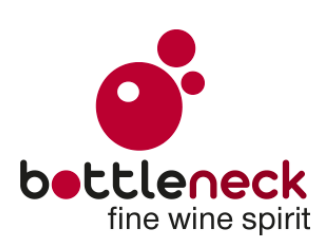



# <center>OPTIMISATION DE LA GESTION DES DONNEES </center>

## Importation et inspection des data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import chart_studio.plotly as py
import cufflinks as cf
%matplotlib inline

# Plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# Utiliser plotly en local
cf.go_offline()

# créer des grafs et les customiser
import plotly.graph_objects as go

### Importation des fichiers de données

Déclaration des formats possibles de valeurs nulles :

In [2]:
v_null = ['na', '', 'n/a', '-', '--']

#### Fichier ERP
L'export de l'ERP contenant les références produits, leur prix de vente et leur état de stock : 
5 variables : l'id produit (product_id), le statut de vente en ligne (onsale_web),
le prix de vente (price), la quantité en stock (stock_quantity) et le statut du stock (stock_status)

In [3]:
erp0 = pd.read_csv('erp.csv', sep = ';' , na_values = v_null)
erp0.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


Nous n'allons nous intéresser qu'aux produits ayant la variable 'onsale_web' à 1 D'autre part, la variable (stock_status) est redondante avec la variable (stock_quantity), donc nous n'en tiendrons pas compte

In [4]:
erp = erp0.loc[erp0['onsale_web']==1, ["product_id","price", "stock_quantity" ]]
erp.head()

,product_id,price,stock_quantity
0,3847,24.2,0
1,3849,34.3,0
2,3850,20.8,0
3,4032,14.1,0
4,4039,46.0,0


#### Fichier WEB

L'export de l'outil de CMS contenant les informations produits : 
28 variables dont nous ne conserverons que celles qui nous intéressent et nous permettent d'identifier le produit et garantir unicité. 

In [5]:
web0 = pd.read_csv('web.csv', sep = ';' , na_values = v_null)
web0.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


Nous ne gardons donc que les colonnes suivantes : 
(SKU) : la référence du produit, (total_sales) : le nombre d'exemplaires vendus, (post_title) : la description du produit

In [6]:
web = web0[["sku","total_sales", "post_title"]]
web.head()

,sku,total_sales,post_title
0,bon-cadeau-25-euros,10.0,Bon cadeau de 25€
1,15298,6.0,Pierre Jean Villa Saint-Joseph Préface 2018
2,15296,0.0,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017
3,15300,0.0,Pierre Jean Villa Crozes-Hermitage Accroche Co...
4,19814,3.0,Pierre Jean Villa IGP Collines Rhodaniennes Ga...


#### Fichier LIAISON

Le fichier établissant le lien entre les deux fichiers précédents (réf produit).

NB : nous constatons que certaines valeurs manquent dans la deuxième colonne 

Nous devrons donc les lister et les extraire des fichiers à analyser. (fichier liaison_vide)

In [7]:
liaison = pd.read_csv('liaison.csv', sep = ';' , na_values = v_null)
liaison.head()

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


Nous devons remplacer le nom de la colonne (id_web) par (sku)

In [8]:
liaison.rename(columns={"id_web" : "sku"}, inplace = True)
liaison.head()

,product_id,sku
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


### Inspection et contrôle des données

#### Inspection des données : info, describe

In [9]:
# erp.info()
liaison.describe()

,product_id
count,825.000000
mean,5162.597576
std,902.644635
min,3847.000000
25%,4348.000000
50%,4907.000000
75%,5805.000000
max,7338.000000


#### Contrôle des données 

##### Recherche des valeurs nulles

In [10]:
# vérification des NaN fichier WEB
web.isnull().sum()

sku            85
total_sales    83
post_title     83
dtype: int64

Le fichier WEB contient 83 lignes totalement vides plus deux lignes pour lesquelles le sku seul manque <br>
Nous allons donc identifier ces deux lignes afin de décider de les garder ou de les supprimer

In [11]:
# select lignes where sku = '' and (total_sales or post_title !='')
web_vide = web[(web['sku'].isna()) & ((web['total_sales'].isna() == False) | (web['post_title'].isna() == False))]
web_vide

,sku,total_sales,post_title
470,NaN,0.0,Pierre Jean Villa Côte Rôtie Fongeant 2017
471,NaN,0.0,Pierre Jean Villa Condrieu Jardin Suspendu 2018


Il peut s'agir d'une erreur de saisie (sku, désignation, doublon corrigé...) <br>
Puisqu'ils ne totalisent aucune vente, je les retire de l'analyse.


In [12]:
w_id_supp = web_vide.index
web.drop(w_id_supp, inplace = True)

In [13]:
# et je supprime les autres lignes à vide
web = web.dropna()

# et je vérifie 
web.isnull().sum() 

sku            0
total_sales    0
post_title     0
dtype: int64

In [14]:
# vérification des NaN fichier ERP
erp.isnull().sum()   ## OK 

product_id        0
price             0
stock_quantity    0
dtype: int64

In [15]:
# vérification des NaN fichier LIAISON
liaison.isnull().sum()  ## A CONTROLER

product_id     0
sku           91
dtype: int64

Aucune valeur vide pour ce qui concerne l'id produit. <br>
Nous savions qu'il manquait des correspondances avec sku. <br>
D'autre part, il faudra vérifier si ces 91 références manquantes correspondent 
aux produits présents dans l'ERP mais non vendues sur le site web.

In [16]:
# je crée donc une série avec la liste des 91 id produits n'ayant pas de concordance avec id web
liaison_vide = liaison.loc[(liaison['sku'].isna()) & (liaison['product_id'].isna() == False), 'product_id']
liaison_vide.head()

19     4055
49     4090
50     4092
119    4195
131    4209
Name: product_id, dtype: int64

##### Recherche des doublons

In [17]:
# recherche des doublons dans le fichier WEB
web.duplicated().sum()

714

In [18]:
# suppression des doublons dans le fichier WEB
web = web.drop_duplicates()

# et je vérifie 
web.duplicated().sum()

0

In [19]:
# recherche des doublons dans le fichier ERP
erp.duplicated().sum()

0

In [20]:
# recherche des doublons dans le fichier LIAISON
liaison.duplicated().sum()

0

##### Vérification des formats

In [21]:
# vérification des formats du fichier WEB
web.dtypes

sku             object
total_sales    float64
post_title      object
dtype: object

SKU n'est pas au bon format : **object** au lieu de **int** <br>
Nous constatons effectivement dès la première ligne qu'il existe des sku au format texte 

In [22]:
web.iloc[0, 0]

'bon-cadeau-25-euros'

Je vérifie le fichier liaison
Si dans ce dernier, la variable 'sku' est également au format object, alors je laisse ainsi

In [23]:
liaison.dtypes

product_id     int64
sku           object
dtype: object

In [24]:
erp.dtypes

product_id          int64
price             float64
stock_quantity      int64
dtype: object

### Gestion des valeurs manquantes dans le fichier Liaison

Il s'agit de contrôler si les **product_id** formant la série **liaison_vide** sont présents ou non dans le fichier **erp**
Notre hypothèse est que les **sku** manquants concernent des produits qui ne sont pas vendus en ligne (onsale_web = 0).

In [25]:
# je cherche les éléments de la liste présents dans le fichier erp et je les stocke dans le fichier v_erp_liaison
v_erp_liaison = erp.loc[erp['product_id'].isin(liaison_vide)]
v_erp_liaison

,product_id,price,stock_quantity
242,4594,144.0,0
486,5070,84.7,0
487,5075,43.3,0


Notre hypothèse semble confirmée puisque sur les 91 valeurs manquantes, seules 3 sont présentes dans le fichier erp.
Je vais donc retirer ces 91 lignes du fichier liaison.

In [26]:
liaison.drop(liaison.loc[liaison['product_id'].isin(liaison_vide)].index, inplace = True)

Je retire également les 3 lignes précédemment identifiées du fichier erp :

In [27]:
erp.drop(erp.loc[erp['product_id'].isin(v_erp_liaison['product_id'])].index, inplace = True)

le fichier **erp** comprend 714 lignes <br>
le fichier **web** comprend 714 lignes <br>
le fichier **liaison** comprend 734 lignes <br>
Au départ, ce dernier en comprenait 825. Le nombre de produits retirés du fichier **erp** car non vendus en ligne est de 108. <br>
825-108-3 = 714. <br>
Il convient alors d'identifier les produits non vendus en ligne encore présents dans le fichier liaison et de les retirer.<br>
Il conviendra ensuite de vérifier que les références sont bien les mêmes dans les trois fichiers.

In [28]:
# 1/ je vérifie que toutes les produits de l'erp sont dans liaison 
comp_erp_liaison = erp.loc[erp['product_id'].isin(liaison['product_id'])].count()
comp_erp_liaison   # 714 >> oK toutes les lignes erp sont dans liaison

product_id        714
price             714
stock_quantity    714
dtype: int64

In [29]:
# 2/ je sélectionne et supprime toutes les autres lignes, 
# celles qui ne sont pas présentes dans erp mais qui le sont dans liaison (20)
liaison.drop(liaison.loc[~liaison['product_id'].isin(erp['product_id'])].index, inplace = True)
liaison.shape

(714, 2)

In [30]:
# 3/ je vérifie que toutes les produits de web sont dans liaison  
comp_web_liaison = web.loc[web['sku'].isin(liaison['sku'])].count()
comp_web_liaison   # 714 >> oK toutes les lignes web sont dans liaison

sku            714
total_sales    714
post_title     714
dtype: int64

## Rapprochement des data

In [31]:
# les vérifications précédentes me permettent de réaliser une jointure simple (inner)
base_compl = pd.merge(pd.merge(erp, liaison, on='product_id'), web, on='sku')
base_compl

,product_id,price,stock_quantity,sku,total_sales,post_title
0,3847,24.2,0,15298,6.0,Pierre Jean Villa Saint-Joseph Préface 2018
1,3849,34.3,0,15296,0.0,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017
2,3850,20.8,0,15300,0.0,Pierre Jean Villa Crozes-Hermitage Accroche Co...
3,4032,14.1,0,19814,3.0,Pierre Jean Villa IGP Collines Rhodaniennes Ga...
4,4039,46.0,0,19815,0.0,Pierre Jean Villa Côte Rôtie Carmina 2017
...,...,...,...,...,...,...
709,6930,8.4,83,16135,5.0,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015
710,7023,27.5,15,15891,0.0,Camin Larredya Jurançon Sec La Virada 2018
711,7025,69.0,2,15887,0.0,Domaine Jamet Côte Rôtie Fructus Voluptas 2018
712,7247,54.8,23,13127-1,0.0,Clos du Mont-Olivet Châteauneuf-du-Pape 2007


## Analyse du chiffre d'affaires

### Chiffre d'affaires par produit

In [32]:
# le CA par produit correspond au prix * nb de ventes
base_compl['CA'] = base_compl['price'] * base_compl['total_sales']
base_compl

,product_id,price,stock_quantity,sku,total_sales,post_title,CA
0,3847,24.2,0,15298,6.0,Pierre Jean Villa Saint-Joseph Préface 2018,145.2
1,3849,34.3,0,15296,0.0,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,0.0
2,3850,20.8,0,15300,0.0,Pierre Jean Villa Crozes-Hermitage Accroche Co...,0.0
3,4032,14.1,0,19814,3.0,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,42.3
4,4039,46.0,0,19815,0.0,Pierre Jean Villa Côte Rôtie Carmina 2017,0.0
...,...,...,...,...,...,...,...
709,6930,8.4,83,16135,5.0,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,42.0
710,7023,27.5,15,15891,0.0,Camin Larredya Jurançon Sec La Virada 2018,0.0
711,7025,69.0,2,15887,0.0,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,0.0
712,7247,54.8,23,13127-1,0.0,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,0.0


### Chiffre d'affaires total réalisé en ligne

In [33]:
CA_tot = base_compl["CA"].sum()
print('Le CA total des produits vendus en ligne est de : ', f'{CA_tot:,.2f}', '€')

Le CA total des produits vendus en ligne est de :  70,568.60 €


## Vérification prix produit

### Identification des outliers

Il s'agit de rechercher les données aberrantes, celles qui sont très distantes de la moyenne du jeu de données. <br>
Leur présence peut être normale ou relever d'un biais (problème de mesure, erreur de saisie...). <br>
Dans tous les cas, elles peuvent perturber les opérations statistiques réalisées sur le jeu de données. <br>

Je choisis de rechercher les outliers ayant plus de 2 écart-types d'écart, ce qui, sur une courbe normale, représente une probabilité de présence dans le jeu de données inférieure à 5%.

In [34]:
# calcul de la moyenne
mean = base_compl['price'].mean()

# calcul de l'écart-type
std = base_compl['price'].std()

# recherche des outliers avec écart-type > 2
z_score_outlier = [i for i in base_compl['price'] if (i-mean)/std > 2]

# sélection des outliers et enregistrement dans un fichier .csv pour transmission 
liste_out = base_compl.loc[(base_compl['price'].isin(z_score_outlier)), ["product_id", 'post_title','price', 'CA']]
liste_out.to_csv('liste_out.csv', index=False)

# affichage des outliers
liste_out.sort_values(by='price',ascending=False)

,product_id,post_title,price,CA
199,4352,Champagne Egly-Ouriet Grand Cru Millésimé 2008,225.0,1125.0
426,5001,David Duband Charmes-Chambertin Grand Cru 2014,217.5,0.0
587,5892,Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...,191.3,573.9
218,4402,Cognac Frapin VIP XO,176.0,2288.0
553,5767,Camille Giroud Clos de Vougeot 2016,175.0,0.0
221,4406,Cognac Frapin Château de Fontpinot 1989 20 Ans...,157.0,0.0
381,4904,Domaine Des Croix Corton Charlemagne Grand Cru...,137.0,685.0
642,6126,Champagne Gosset Célébris Vintage 2007,135.0,270.0
201,4355,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,126.5,1391.5
511,5612,Domaine Weinbach Gewurztraminer Grand Cru Furs...,124.8,0.0


Nous avons donc trente outliers dont les tarifs vont de 88.40 € à 225 €. <br>

Il conviendra dans un premier temps, de se rapprocher du service commercial pour vérifier la validité des prix saisis. (transmettre le fichier liste_out.csv) <br>
Nous pourrons ensuite comparer avec les prix du marché pour éviter toute autre erreur.

### Représentation graphique

In [35]:
# création de la boxplot ou boîte à moustaches
px.box(base_compl, x='price', points='all')      

Ce graphique représente la dispersion des produits en fonction de leur prix unitaire. <br>
La boxplot représente la médiane (trait central) qui est de 23.55 € <br> 
  *=> il existe autant de valeurs supérieures qu'inférieures à cette valeur dans le jeu de données* <br>

la répartition par quartiles : <br>
Q1 = 14.10 € <br>
Q2 = médiane = 23.55 € <br>
Q3 = 42.20 € <br>

et les valeurs min et max (5.20 € et 83.70 €) <br>
   *=> max = Q3-Q1 * 1.5*<br>
   
Au-delà de ces éléments, nous retrouvons les outliers (de 88.40 € à 225.00 €) <br>

Nous constatons que la grande majorité des produits a un prix unitaire inférieur à 14.10€.

### Impact sur le CA

#### Proportion du CA total réalisé par les outliers

In [36]:
# calcul du CA total des outliers : 
CA_out = liste_out["CA"].sum()
print('Le CA total des outliers : ', f'{CA_out:,.2f}', '€')

# représentation graphique sous forme de camembert 
CA = [CA_tot, CA_out]
colors = ['blue', 'red']
fig = go.Figure(data=[go.Pie(labels=['CA Total', 'CA Outliers'], 
                             pull=[0, 0.2],
                            values=[CA[0],CA[1]])])
fig


Le CA total des outliers :  6,884.40 €


#### CA total sans les outliers

In [37]:
CA_no_out = CA_tot - CA_out
print('Le CA total sans les outliers : ', f'{CA_no_out:,.2f}', '€')

Le CA total sans les outliers :  63,684.20 €
